In [1]:
import pandas as pd

file_path = 'IRE_GHG/co2_mhd_surface-flask_1_ccgg_event.txt'
df = pd.read_csv(file_path, delimiter='\s+', comment='#')

columns_needed = ['year', 'month', 'day', 'hour', 'minute', 'second', 'value']
new_df = df[columns_needed]

print(new_df.head())

   year  month  day  hour  minute  second   value
0  1991      6    3     9      50       0  358.63
1  1991      6    3     9      50       0  358.60
2  1991      6   10    12      35       0  359.06
3  1991      6   10    12      35       0  359.08
4  1991      6   17    11      57       0  357.12


In [2]:
# Lists all unique values for the 'second' column
unique_seconds = new_df['second'].unique()

print(unique_seconds)

[ 0 56]


In [3]:
# Count the number of occurrences of each value in the 'second' column
second_counts = new_df['second'].value_counts()

print(second_counts)

second
0     2981
56      10
Name: count, dtype: int64


In [4]:
# Delete the 'second' column, compare the other columns except the 'value' column
# Merge the rows if all values are the same, and average the 'value' column
new_df = new_df.drop(columns=['second'])

grouped_df = new_df.groupby(['year', 'month', 'day', 'hour', 'minute']).agg({'value': 'mean'}).reset_index()
print(grouped_df)

      year  month  day  hour  minute    value
0     1991      6    3     9      50  358.615
1     1991      6   10    12      35  359.070
2     1991      6   17    11      57  356.775
3     1991      6   20    12      13  353.490
4     1991      6   25     9      50  355.755
...    ...    ...  ...   ...     ...      ...
1506  2022     11    1     9      50  420.495
1507  2022     11    8    13       0  421.085
1508  2022     12    2    12       0  428.745
1509  2022     12    7    12      45  421.485
1510  2022     12   22    13      40  423.325

[1511 rows x 6 columns]


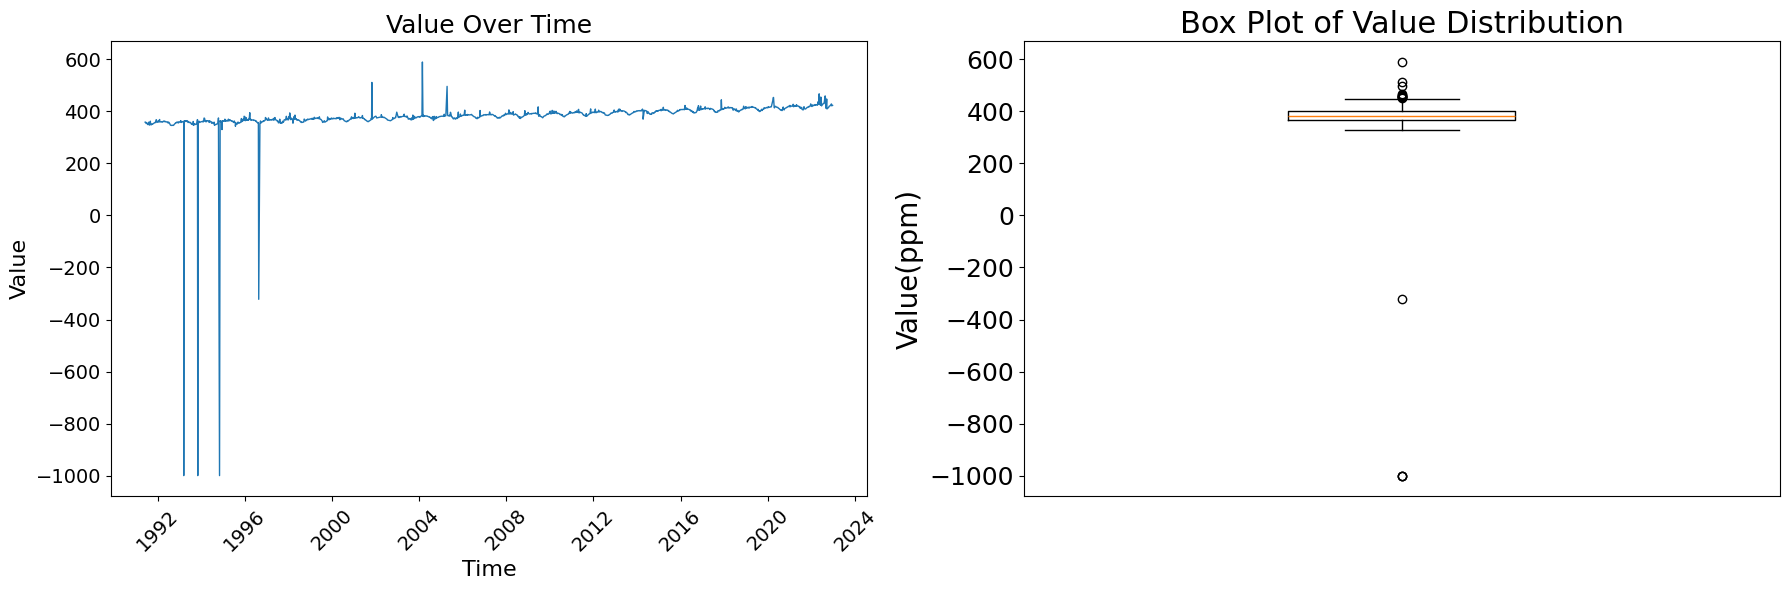

In [5]:
# import matplotlib.pyplot as plt

# # Create time column
# grouped_df['time'] = pd.to_datetime(grouped_df[['year', 'month', 'day', 'hour', 'minute']])
# grouped_df = grouped_df.sort_values('time')

# # Draw line diagrams and box diagrams to represent the distribution of values
# fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# ax[0].plot(grouped_df['time'], grouped_df['value'], linestyle='-', linewidth=1)
# ax[0].set_xlabel('Time')
# ax[0].set_ylabel('Value')
# ax[0].set_title('Value Over Time')
# ax[0].tick_params(axis='x', rotation=45)

# ax[1].boxplot(grouped_df['value'])
# ax[1].set_ylabel('Value')
# ax[1].set_title('Box Plot of Value Distribution')

# plt.tight_layout()
# plt.show()
import matplotlib.pyplot as plt

# Create time column
grouped_df['time'] = pd.to_datetime(grouped_df[['year', 'month', 'day', 'hour', 'minute']])
grouped_df = grouped_df.sort_values('time')

# Draw line diagrams and box diagrams to represent the distribution of values
fig, ax = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [5, 5]})  # Adjust width ratios


# Line plot
ax[0].plot(grouped_df['time'], grouped_df['value'], linestyle='-', linewidth=1)
ax[0].set_xlabel('Time', fontsize=16)
ax[0].set_ylabel('Value', fontsize=16)
ax[0].set_title('Value Over Time', fontsize=18)
ax[0].tick_params(axis='x', rotation=45, labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)

# Box plot
ax[1].boxplot(grouped_df['value'],widths=0.3)
ax[1].set_xticks([])  # Remove the x-axis tick
ax[1].set_ylabel('Value(ppm)', fontsize=20)
ax[1].set_title('Box Plot of Value Distribution', fontsize=22)
ax[1].tick_params(axis='y', labelsize=18)

plt.tight_layout()
plt.show()



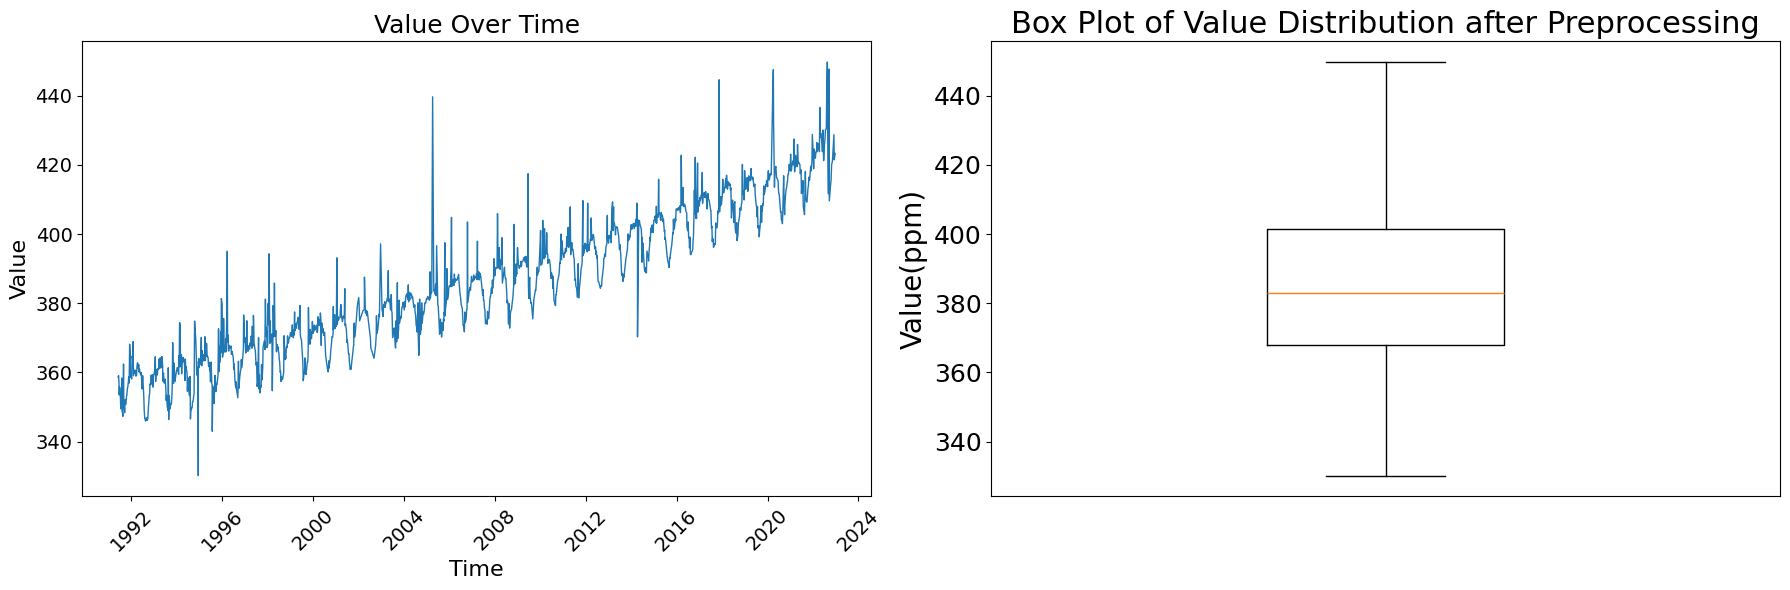

In [6]:
import matplotlib.pyplot as plt

# Find the location of the outlier (assuming more than 1.5 times IQR is the outlier)
Q1 = grouped_df['value'].quantile(0.25)
Q3 = grouped_df['value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (grouped_df['value'] < lower_bound) | (grouped_df['value'] > upper_bound)

# Replace the outlier with the average of the preceding and following values
for i in range(1, len(grouped_df) - 1):
    if outliers.iloc[i]:
        grouped_df.at[i, 'value'] = (grouped_df['value'].iloc[i - 1] + grouped_df['value'].iloc[i + 1]) / 2

# Draw line and box plots
fig, ax = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [5, 5]})

# Line plot
ax[0].plot(grouped_df['time'], grouped_df['value'], linestyle='-', linewidth=1)
ax[0].set_xlabel('Time', fontsize=16)
ax[0].set_ylabel('Value', fontsize=16)
ax[0].set_title('Value Over Time', fontsize=18)
ax[0].tick_params(axis='x', rotation=45, labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)

# Box plot
ax[1].boxplot(grouped_df['value'],widths=0.3)
ax[1].set_xticks([])  # Remove the x-axis tick
ax[1].set_ylabel('Value(ppm)', fontsize=20)
ax[1].set_title('Box Plot of Value Distribution after Preprocessing', fontsize=22)
ax[1].tick_params(axis='y', labelsize=18)

plt.tight_layout()
plt.show()


In [7]:
grouped_df.rename(columns={'value': 'co2_value'}, inplace=True)
grouped_df

,year,month,day,hour,minute,co2_value,time
0,1991,6,3,9,50,358.615,1991-06-03 09:50:00
1,1991,6,10,12,35,359.070,1991-06-10 12:35:00
2,1991,6,17,11,57,356.775,1991-06-17 11:57:00
3,1991,6,20,12,13,353.490,1991-06-20 12:13:00
4,1991,6,25,9,50,355.755,1991-06-25 09:50:00
...,...,...,...,...,...,...,...
1506,2022,11,1,9,50,420.495,2022-11-01 09:50:00
1507,2022,11,8,13,0,421.085,2022-11-08 13:00:00
1508,2022,12,2,12,0,428.745,2022-12-02 12:00:00
1509,2022,12,7,12,45,421.485,2022-12-07 12:45:00


In [8]:
# 删去 'hour' 和 'minute' 列
grouped_df.drop(['hour', 'minute'], axis=1, inplace=True)

# 修改 'time' 列只显示年月日
grouped_df['time'] = pd.to_datetime(grouped_df['time']).dt.date
grouped_df

,year,month,day,co2_value,time
0,1991,6,3,358.615,1991-06-03
1,1991,6,10,359.070,1991-06-10
2,1991,6,17,356.775,1991-06-17
3,1991,6,20,353.490,1991-06-20
4,1991,6,25,355.755,1991-06-25
...,...,...,...,...,...
1506,2022,11,1,420.495,2022-11-01
1507,2022,11,8,421.085,2022-11-08
1508,2022,12,2,428.745,2022-12-02
1509,2022,12,7,421.485,2022-12-07


In [9]:
grouped_df['time'] = pd.to_datetime(grouped_df[['year', 'month', 'day']])

# Create time series
full_date_range = pd.date_range(start=grouped_df['time'].min(), end=grouped_df['time'].max(), freq='D')

df_full = pd.DataFrame(full_date_range, columns=['time'])
df_full = pd.merge(df_full, grouped_df[['time', 'co2_value']], on='time', how='left')

# Use linear interpolation to fill in the missing co2 values
df_full['co2_value'] = df_full['co2_value'].interpolate(method='linear')
df_full

,time,co2_value
0,1991-06-03,358.615000
1,1991-06-04,358.680000
2,1991-06-05,358.745000
3,1991-06-06,358.810000
4,1991-06-07,358.875000
...,...,...
11530,2022-12-18,422.834333
11531,2022-12-19,422.957000
11532,2022-12-20,423.079667
11533,2022-12-21,423.202333


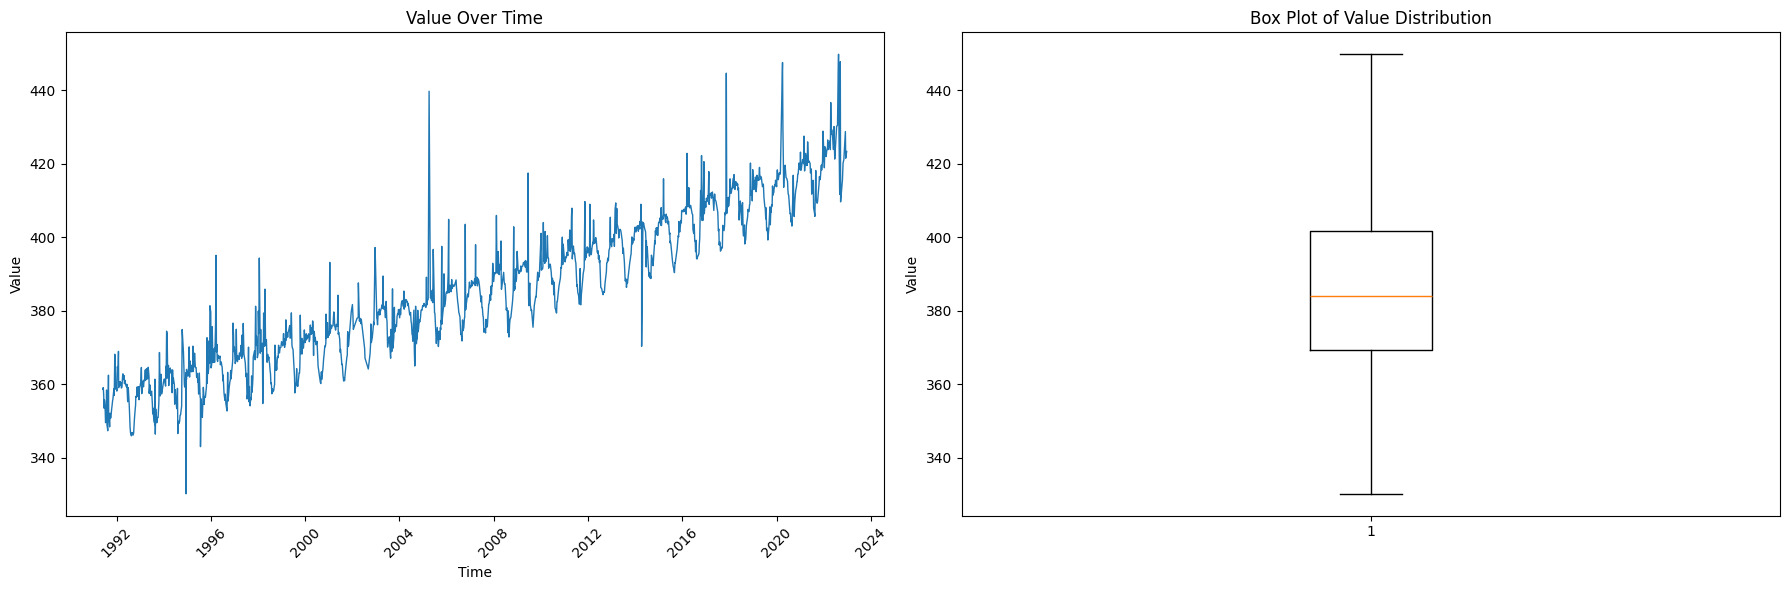

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

ax[0].plot(df_full['time'], df_full['co2_value'], linestyle='-', linewidth=1)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Value')
ax[0].set_title('Value Over Time')
ax[0].tick_params(axis='x', rotation=45)

ax[1].boxplot(df_full['co2_value'])
ax[1].set_ylabel('Value')
ax[1].set_title('Box Plot of Value Distribution')

plt.tight_layout()
plt.show()

LSTM model to predict one day

Epoch 1/50


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


260/260 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0191 - val_loss: 5.8938e-04
Epoch 2/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.9400e-04 - val_loss: 6.0714e-04
Epoch 3/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.6246e-04 - val_loss: 4.9332e-04
Epoch 4/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.9022e-04 - val_loss: 5.6480e-04
Epoch 5/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.3523e-04 - val_loss: 3.0654e-04
Epoch 6/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.3668e-04 - val_loss: 2.8467e-04
Epoch 7/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.2935e-04 - val_loss: 4.8522e-04
Epoch 8/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.6426e-04 - val_loss: 2.2304e-04
Epoch 9/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1510e-04 - val_loss: 4.6772e-04
Epoch 10/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.9741e-04 - val_loss: 1.8711e-04
Epoch 11/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4613e-04 - 

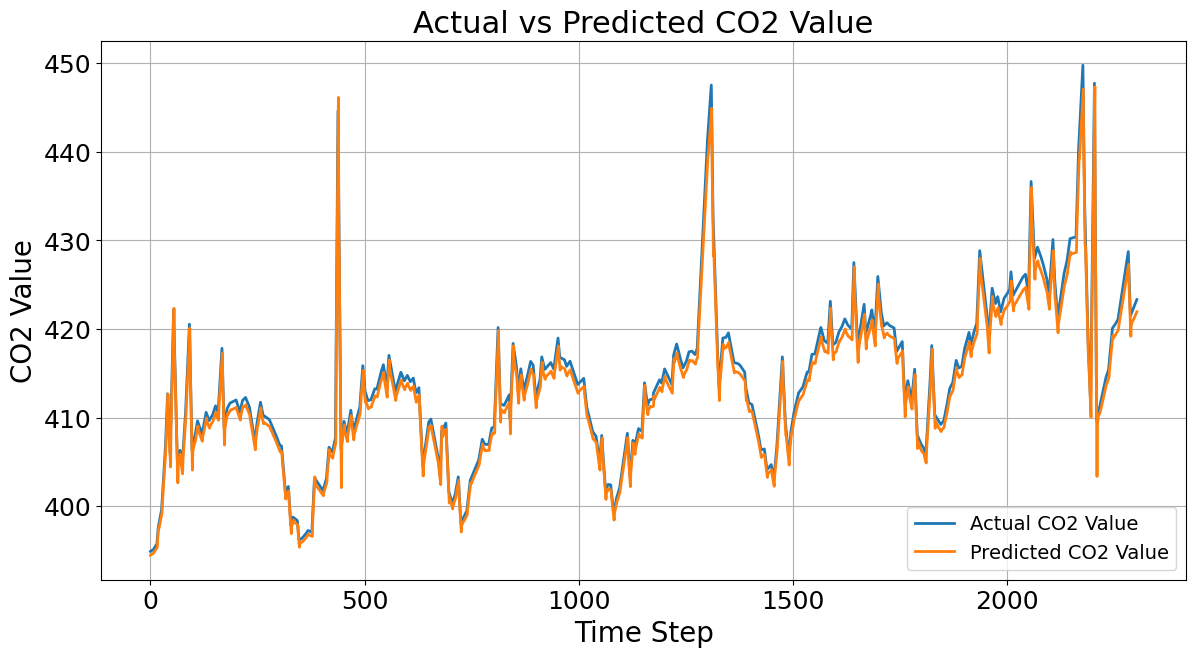

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 数据预处理
df_full['time'] = pd.to_datetime(df_full['time'])
df_full.set_index('time', inplace=True)

values = df_full['co2_value'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

# 创建数据集函数
def create_dataset(data, time_step=10):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(scaled_values, time_step)

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 构建 LSTM 模型
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# 预测
y_pred = model.predict(X_test)

# 反归一化
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred)

# 绘制结果图
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual CO2 Value', linewidth=2)
plt.plot(y_pred, label='Predicted CO2 Value', linewidth=2)
plt.title('Actual vs Predicted CO2 Value', fontsize=22)
plt.xlabel('Time Step', fontsize=20)
plt.ylabel('CO2 Value', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=14)
plt.grid(True)
plt.show()


Look like overfit

Epoch 1/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.5599e-05 - val_loss: 1.3974e-04
Epoch 2/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.1823e-05 - val_loss: 1.5039e-04
Epoch 3/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.6687e-05 - val_loss: 1.4383e-04
Epoch 4/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.1795e-05 - val_loss: 1.4158e-04
Epoch 5/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.8698e-05 - val_loss: 1.6658e-04
Epoch 6/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.1148e-05 - val_loss: 1.6317e-04
Epoch 7/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.2229e-05 - val_loss: 1.3717e-04
Epoch 8/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.8724e-05 - val_loss: 1.5357e-04
Epoch 9/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.3805e-05 - val_loss: 1.5344e-04
Epoch 10/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.6044e-05 - val_loss: 1.3890e-04
Epoch 11/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss

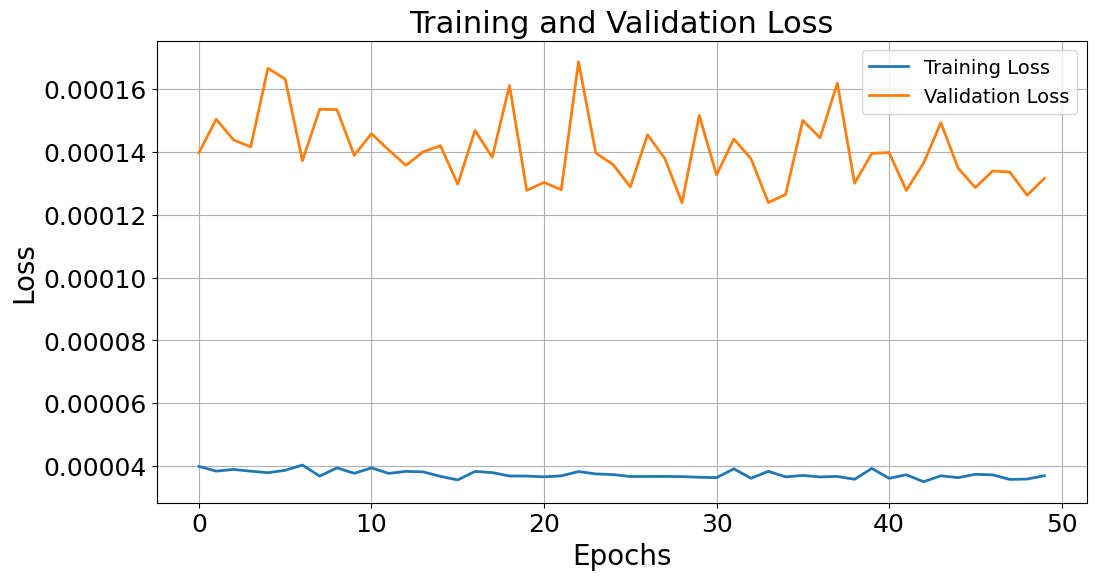

In [12]:
# 训练模型并保存训练历史
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# 绘制训练和验证损失曲线
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Training and Validation Loss', fontsize=22)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=14)
plt.grid(True)
plt.show()



The Validation loss is significantly higher than the training loss, and it fluctuates greatly. This situation indicates that the model does not perform well on the validation set and cannot be generalized well, indicating that there is a certain degree of overfitting.

Using dropout and early stop

Epoch 1/50


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


260/260 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.3794 - val_loss: 0.0057
Epoch 2/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0052 - val_loss: 0.0024
Epoch 3/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0032 - val_loss: 0.0024
Epoch 4/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0031 - val_loss: 0.0020
Epoch 5/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0023 - val_loss: 0.0043
Epoch 6/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 7/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0021 - val_loss: 0.0044
Epoch 8/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 9/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0021 - val_loss: 0.0039
Epoch 10/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0019 - val_loss: 0.0030
Epoch 11/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 12/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.

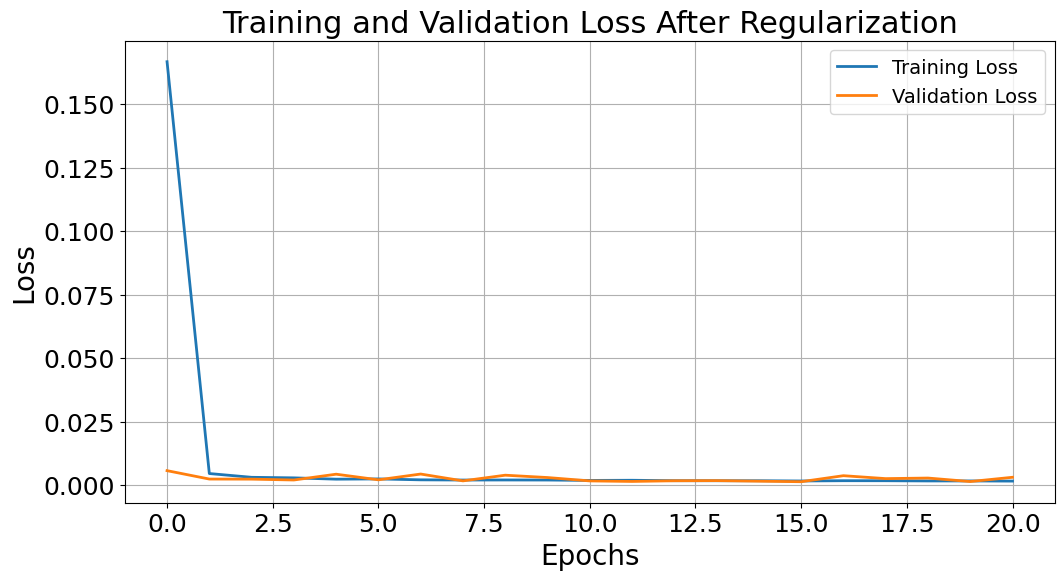

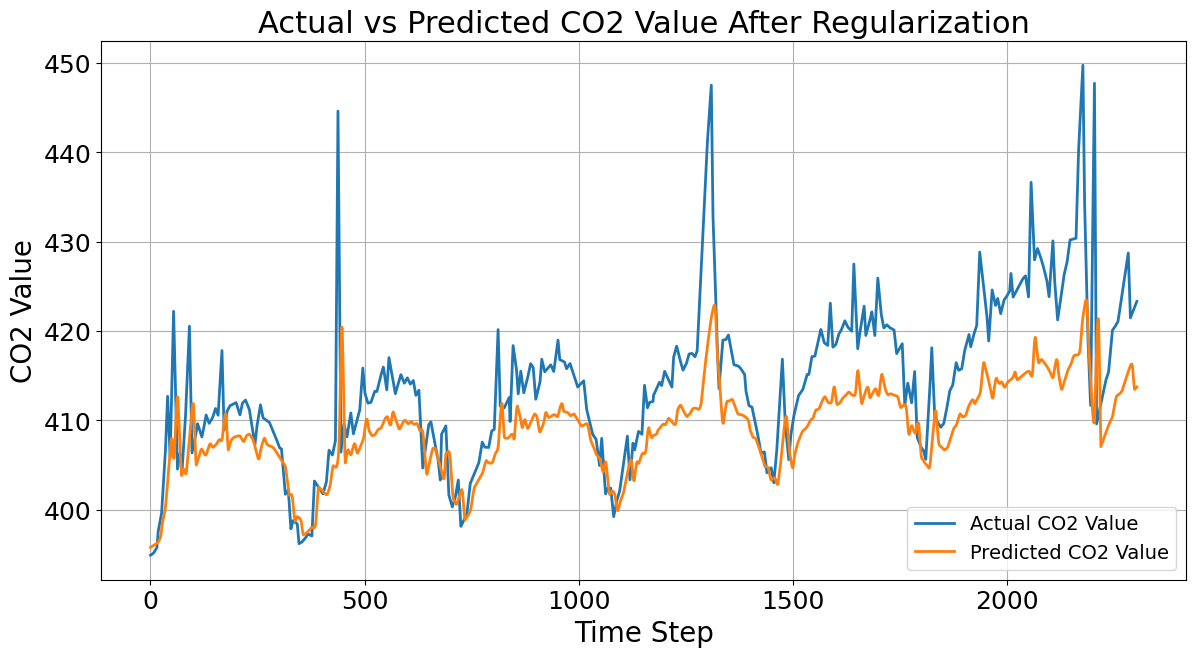

In [13]:
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential

# 检查时间列是否存在，如果不存在则重置索引
if 'time' not in df_full.columns:
    df_full.reset_index(inplace=True)

# 将时间列转换为日期时间格式并设置为索引
df_full['time'] = pd.to_datetime(df_full['time'])
df_full.set_index('time', inplace=True)

# 提取并缩放 CO2 值
values = df_full['co2_value'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

# 创建数据集函数
def create_dataset(data, time_step=10):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

# 设置时间步长并创建数据集
time_step = 10
X, y = create_dataset(scaled_values, time_step)

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 构建 LSTM 模型，添加 Dropout 防止过拟合
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1), kernel_regularizer='l2'))
model.add(Dropout(0.2))  # 添加 Dropout 层以减少过拟合
model.add(LSTM(50, return_sequences=False, kernel_regularizer='l2'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 使用早停机制
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 训练模型
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, 
                    callbacks=[early_stopping], verbose=1)

# 预测
y_pred = model.predict(X_test)

# 反归一化
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred)

# 绘制训练和验证损失曲线
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Training and Validation Loss After Regularization', fontsize=22)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

# 绘制实际值与预测值对比图
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual CO2 Value', linewidth=2)
plt.plot(y_pred, label='Predicted CO2 Value', linewidth=2)
plt.title('Actual vs Predicted CO2 Value After Regularization', fontsize=22)
plt.xlabel('Time Step', fontsize=20)
plt.ylabel('CO2 Value', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=14)
plt.grid(True)
plt.show()


The training loss dropped rapidly to near zero in the first few epochs, indicating that the model fits the training data very well. Training losses for the first epoch were higher, but quickly decreased to near zero.

Validation losses are consistently kept at a very low level and close to training losses. 

This shows that the performance of the model on the verification set is also stable, and there is no obvious overfitting.

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")


MSE: 50.7480
R²: 0.3101


Predict 7 days

Epoch 1/50


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


260/260 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.3736 - val_loss: 0.0093
Epoch 2/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0054 - val_loss: 0.0043
Epoch 3/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0034 - val_loss: 0.0021
Epoch 4/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0027 - val_loss: 0.0016
Epoch 5/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0025 - val_loss: 0.0036
Epoch 6/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0024 - val_loss: 0.0036
Epoch 7/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 8/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 9/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0020 - val_loss: 0.0016
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Epoch 1/50


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


260/260 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.3913 - val_loss: 0.0061
Epoch 2/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0058 - val_loss: 0.0035
Epoch 3/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0035 - val_loss: 0.0030
Epoch 4/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 5/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 6/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 7/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 8/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0021 - val_loss: 0.0048
Epoch 9/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 10/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 11/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 12/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


260/260 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.3756 - val_loss: 0.0058
Epoch 2/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0052 - val_loss: 0.0025
Epoch 3/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0036 - val_loss: 0.0027
Epoch 4/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0032 - val_loss: 0.0018
Epoch 5/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0027 - val_loss: 0.0024
Epoch 6/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 7/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0023 - val_loss: 0.0061
Epoch 8/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0028 - val_loss: 0.0017
Epoch 9/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0022 - val_loss: 0.0030
Epoch 10/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0020 - val_loss: 0.0073
Epoch 11/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 12/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


260/260 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.3786 - val_loss: 0.0054
Epoch 2/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0049 - val_loss: 0.0028
Epoch 3/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 4/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0030 - val_loss: 0.0022
Epoch 5/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0027 - val_loss: 0.0044
Epoch 6/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 7/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0026 - val_loss: 0.0031
Epoch 8/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0024 - val_loss: 0.0031
Epoch 9/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0023 - val_loss: 0.0053
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Epoch 1/50


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


260/260 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.3725 - val_loss: 0.0060
Epoch 2/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0056 - val_loss: 0.0029
Epoch 3/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0038 - val_loss: 0.0029
Epoch 4/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0032 - val_loss: 0.0086
Epoch 5/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0030 - val_loss: 0.0046
Epoch 6/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0029 - val_loss: 0.0033
Epoch 7/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 8/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0026 - val_loss: 0.0018
Epoch 9/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 10/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 11/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 12/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


260/260 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.3872 - val_loss: 0.0066
Epoch 2/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0058 - val_loss: 0.0033
Epoch 3/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 4/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0035 - val_loss: 0.0023
Epoch 5/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0029 - val_loss: 0.0066
Epoch 6/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0029 - val_loss: 0.0019
Epoch 7/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0025 - val_loss: 0.0028
Epoch 8/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0025 - val_loss: 0.0033
Epoch 9/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0024 - val_loss: 0.0029
Epoch 10/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0023 - val_loss: 0.0039
Epoch 11/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0023 - val_loss: 0.0070
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Epoch 1/50


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


260/260 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.3751 - val_loss: 0.0059
Epoch 2/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0062 - val_loss: 0.0041
Epoch 3/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0042 - val_loss: 0.0023
Epoch 4/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0032 - val_loss: 0.0023
Epoch 5/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0031 - val_loss: 0.0070
Epoch 6/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0035 - val_loss: 0.0024
Epoch 7/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0025 - val_loss: 0.0033
Epoch 8/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0029 - val_loss: 0.0025
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Performance Metrics for Each Model:
Predict 1 days ahead: MSE = 22.0129, R2 = 0.7012
Predict 2 days ahead: MSE = 54.8179, R2 = 0.2560
Predict 3 days ahead: MSE = 63.7111, R2 = 0.1353
Predict 4 days ahead: MSE = 55.6664, R2 = 0.2444
Predict 5 days ahead: MSE = 82.8459, R2 = -0.1264
Pr

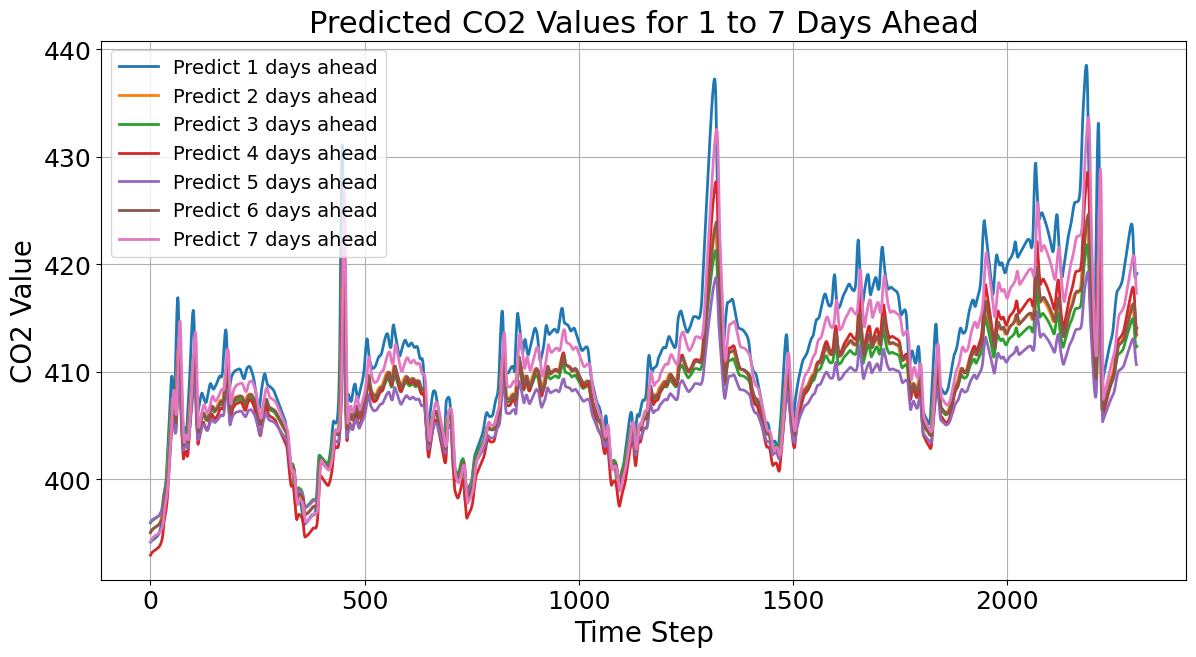

In [15]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 确保时间列正确设置为索引
df_full['time'] = pd.to_datetime(df_full.index)
df_full.set_index('time', inplace=True)

# 提取并缩放 CO2 值
values = df_full['co2_value'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

# 创建数据集函数，使用过去 10 天预测未来 1 到 7 天
def create_dataset(data, time_step=10, predict_days=1):
    X, y = [], []
    for i in range(len(data) - time_step - predict_days):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step + predict_days - 1])
    return np.array(X), np.array(y)

predictions = {}
metrics = {}

# 训练 7 个模型，每个模型预测未来 1 到 7 天的值
for days in range(1, 8):
    X, y = create_dataset(scaled_values, time_step=10, predict_days=days)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # 构建 LSTM 模型
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1), kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False, kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # 早停机制
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # 训练模型
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, 
              callbacks=[early_stopping], verbose=1)
    
    # 预测
    y_pred = model.predict(X_test)

    # 反归一化
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
    y_pred = scaler.inverse_transform(y_pred)

    # 计算评估指标
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # 存储预测结果和指标
    predictions[f'Predict {days} days ahead'] = y_pred.flatten()
    metrics[f'Predict {days} days ahead'] = {'MSE': mse, 'R2': r2}

# 打印每个模型的性能指标
print("Performance Metrics for Each Model:")
for key, value in metrics.items():
    print(f"{key}: MSE = {value['MSE']:.4f}, R2 = {value['R2']:.4f}")

# 绘制每个预测模型的 CO2 值
plt.figure(figsize=(14, 7))
for label, pred in predictions.items():
    plt.plot(pred, label=label, linewidth=2)
plt.title('Predicted CO2 Values for 1 to 7 Days Ahead', fontsize=22)
plt.xlabel('Time Step', fontsize=20)
plt.ylabel('CO2 Value', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=14)
plt.grid(True)
plt.show()



Same steps for BiLSTM

Epoch 1/50


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


260/260 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 1.1069 - val_loss: 0.0043
Epoch 2/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0036 - val_loss: 0.0051
Epoch 3/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0021 - val_loss: 7.7572e-04
Epoch 4/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0013 - val_loss: 7.7822e-04
Epoch 5/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0011 - val_loss: 5.8100e-04
Epoch 6/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 9.7653e-04 - val_loss: 0.0042
Epoch 7/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 8/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 8.9244e-04 - val_loss: 5.6947e-04
Epoch 9/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 9.0779e-04 - val_loss: 0.0013
Epoch 10/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 7.4200e-04 - val_loss: 4.1140e-04
Epoch 11/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 7.6279e-04 - val_loss: 4.4453e-04
Epoch 12/50
260

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


260/260 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 1.1025 - val_loss: 0.0049
Epoch 2/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0038 - val_loss: 0.0019
Epoch 3/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0021 - val_loss: 9.4071e-04
Epoch 4/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0015 - val_loss: 9.9041e-04
Epoch 5/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0013 - val_loss: 9.1563e-04
Epoch 6/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 7/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 8/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0012 - val_loss: 0.0026
Epoch 9/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0011 - val_loss: 6.3877e-04
Epoch 10/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 11/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 9.9206e-04 - val_loss: 0.0025
Epoch 12/50
260/260 ━━━━━━━━━━━━━━━━━━━━

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


260/260 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 1.1082 - val_loss: 0.0055
Epoch 2/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0043 - val_loss: 0.0022
Epoch 3/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 4/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0014 - val_loss: 8.9825e-04
Epoch 5/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 6/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0014 - val_loss: 0.0032
Epoch 7/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0012 - val_loss: 8.4187e-04
Epoch 8/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 9/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0012 - val_loss: 7.4280e-04
Epoch 10/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0012 - val_loss: 0.0033
Epoch 11/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0015 - val_loss: 0.0039
Epoch 12/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/s

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


260/260 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 1.1150 - val_loss: 0.0053
Epoch 2/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0044 - val_loss: 0.0034
Epoch 3/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 4/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 5/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0015 - val_loss: 0.0030
Epoch 6/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0015 - val_loss: 0.0022
Epoch 7/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 8/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 9/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 10/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 11/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0013 - val_loss: 8.3091e-04
Epoch 12/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step -

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


260/260 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 1.1021 - val_loss: 0.0073
Epoch 2/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0043 - val_loss: 0.0023
Epoch 3/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0026 - val_loss: 0.0013
Epoch 4/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 5/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 6/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 7/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 8/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 9/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 10/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0017 - val_loss: 0.0030
Epoch 11/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0016 - val_loss: 0.0029
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Epoch 1/50


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


260/260 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 1.1029 - val_loss: 0.0050
Epoch 2/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0043 - val_loss: 0.0051
Epoch 3/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 4/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0020 - val_loss: 0.0037
Epoch 5/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 6/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0020 - val_loss: 0.0041
Epoch 7/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0017 - val_loss: 0.0046
Epoch 8/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0018 - val_loss: 0.0030
Epoch 9/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0018 - val_loss: 0.0031
Epoch 10/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0016 - val_loss: 0.0023
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Epoch 1/50


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


260/260 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1179 - val_loss: 0.0065
Epoch 2/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0055 - val_loss: 0.0024
Epoch 3/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 4/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0022 - val_loss: 0.0060
Epoch 5/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 6/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 7/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 8/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0020 - val_loss: 0.0028
Epoch 9/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 10/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 11/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 12/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 

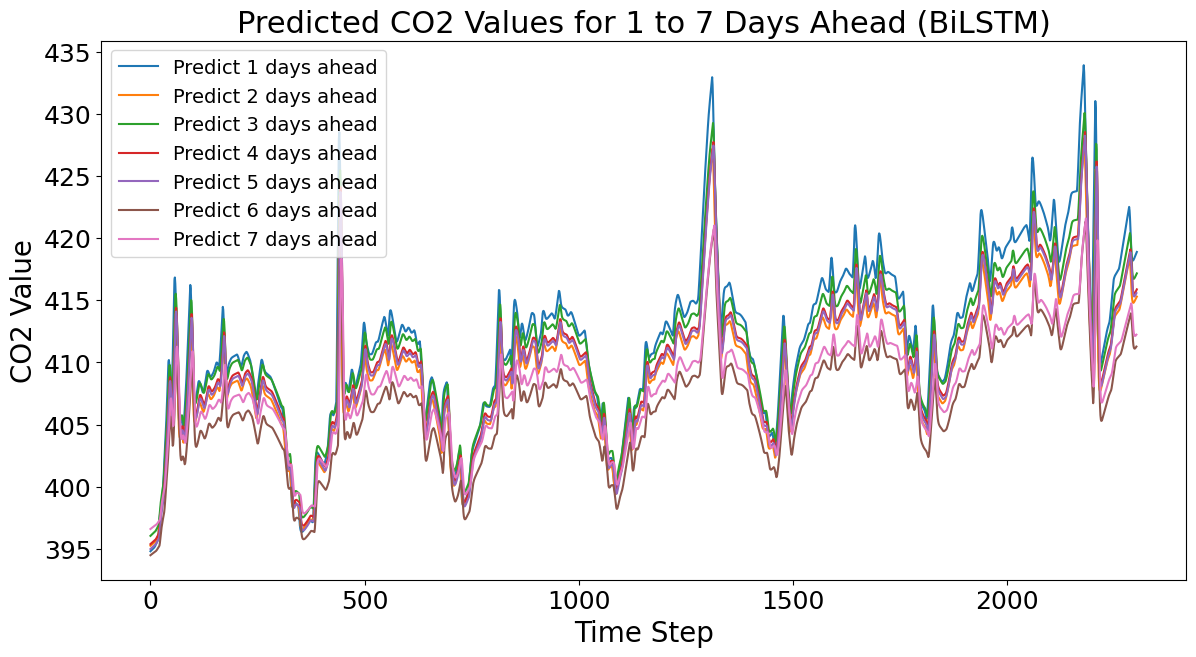

In [16]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional


df_full['time'] = pd.to_datetime(df_full.index)

values = df_full['co2_value'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

def create_dataset(data, time_step=10, predict_days=1):
    X, y = [], []
    for i in range(len(data) - time_step - predict_days):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step + predict_days - 1])
    return np.array(X), np.array(y)

predictions = {}
metrics = {}

for days in range(1, 8):

    X, y = create_dataset(scaled_values, time_step=10, predict_days=days)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = Sequential()
    model.add(Bidirectional(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1), kernel_regularizer=l2(0.01))))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(50, return_sequences=False, kernel_regularizer=l2(0.01))))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, 
              callbacks=[early_stopping], verbose=1)
  
    y_pred = model.predict(X_test)

    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
    y_pred = scaler.inverse_transform(y_pred)
 
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    predictions[f'Predict {days} days ahead'] = y_pred.flatten()
    metrics[f'Predict {days} days ahead'] = {'MSE': mse, 'R2': r2}

print("Performance Metrics for Each BiLSTM Model:")
for key, value in metrics.items():
    print(f"{key}: MSE = {value['MSE']:.4f}, R2 = {value['R2']:.4f}")

plt.figure(figsize=(14, 7))
for label, pred in predictions.items():
    plt.plot(pred, label=label)
plt.title('Predicted CO2 Values for 1 to 7 Days Ahead (BiLSTM)', fontsize = 22)
plt.xlabel('Time Step', fontsize = 20)
plt.ylabel('CO2 Value', fontsize = 20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize = 14)
plt.show()


Repeat 10 times to calculate mean value

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
LSTM Model: Average MSE = 34.4466, Average R² = 0.5325
BiLSTM Model: Average MSE = 15.9941, Average R² = 0.7829


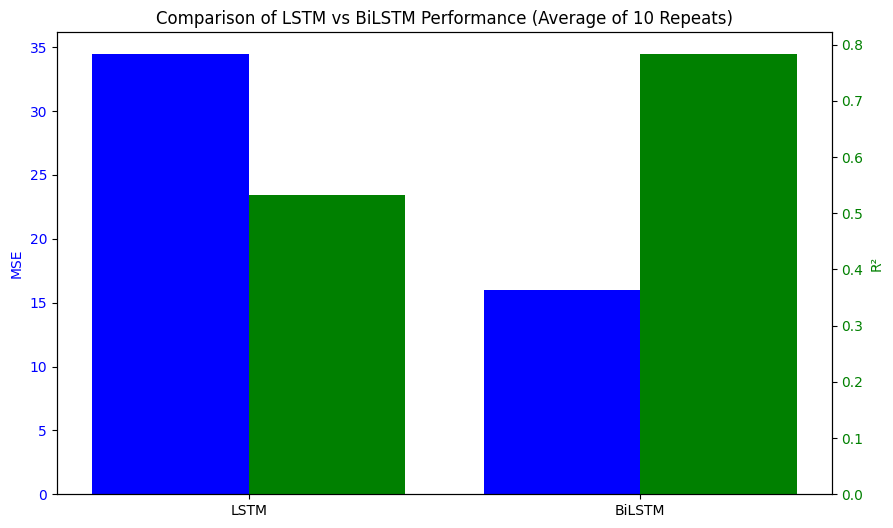

In [17]:
df_full['time'] = pd.to_datetime(df_full.index)
df_full.set_index('time', inplace=True)

values = df_full['co2_value'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

def create_dataset(data, time_step=10, predict_days=1):
    X, y = [], []
    for i in range(len(data) - time_step - predict_days):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step + predict_days - 1])
    return np.array(X), np.array(y)

def train_model(model_type='LSTM', predict_days=1, repeats=10):
    mse_scores = []
    r2_scores = []
    
    for _ in range(repeats):

        X, y = create_dataset(scaled_values, time_step=10, predict_days=predict_days)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        model = Sequential()
        if model_type == 'LSTM':
            model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1), kernel_regularizer=l2(0.01)))
            model.add(Dropout(0.2))
            model.add(LSTM(50, return_sequences=False, kernel_regularizer=l2(0.01)))
        elif model_type == 'BiLSTM':
            model.add(Bidirectional(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1), kernel_regularizer=l2(0.01))))
            model.add(Dropout(0.2))
            model.add(Bidirectional(LSTM(50, return_sequences=False, kernel_regularizer=l2(0.01))))
        model.add(Dropout(0.2))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mean_squared_error')

        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, 
                  callbacks=[early_stopping], verbose=0)

        y_pred = model.predict(X_test)

        y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
        y_pred = scaler.inverse_transform(y_pred)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        mse_scores.append(mse)
        r2_scores.append(r2)

    mse_mean = np.mean(mse_scores)
    r2_mean = np.mean(r2_scores)
    
    return mse_mean, r2_mean

# Compare LSTM and BiLSTM
lstm_mse, lstm_r2 = train_model('LSTM', repeats=10)
bilstm_mse, bilstm_r2 = train_model('BiLSTM', repeats=10)

print(f"LSTM Model: Average MSE = {lstm_mse:.4f}, Average R² = {lstm_r2:.4f}")
print(f"BiLSTM Model: Average MSE = {bilstm_mse:.4f}, Average R² = {bilstm_r2:.4f}")

labels = ['LSTM', 'BiLSTM']
mse_means = [lstm_mse, bilstm_mse]
r2_means = [lstm_r2, bilstm_r2]

x = np.arange(len(labels))

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(x - 0.2, mse_means, 0.4, label='MSE', color='b')
ax1.set_ylabel('MSE', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.bar(x + 0.2, r2_means, 0.4, label='R²', color='g')
ax2.set_ylabel('R²', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.xticks(x, labels)
plt.title('Comparison of LSTM vs BiLSTM Performance (Average of 10 Repeats)')
plt.show()


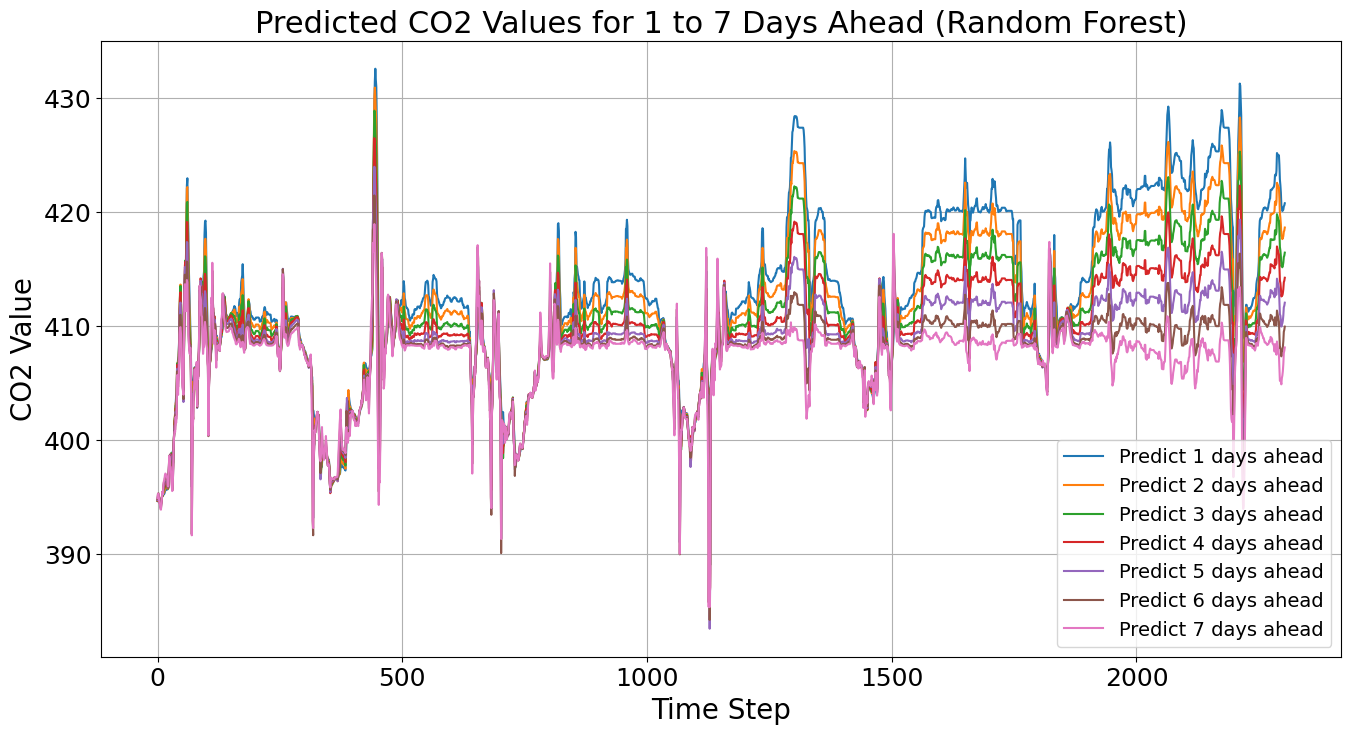

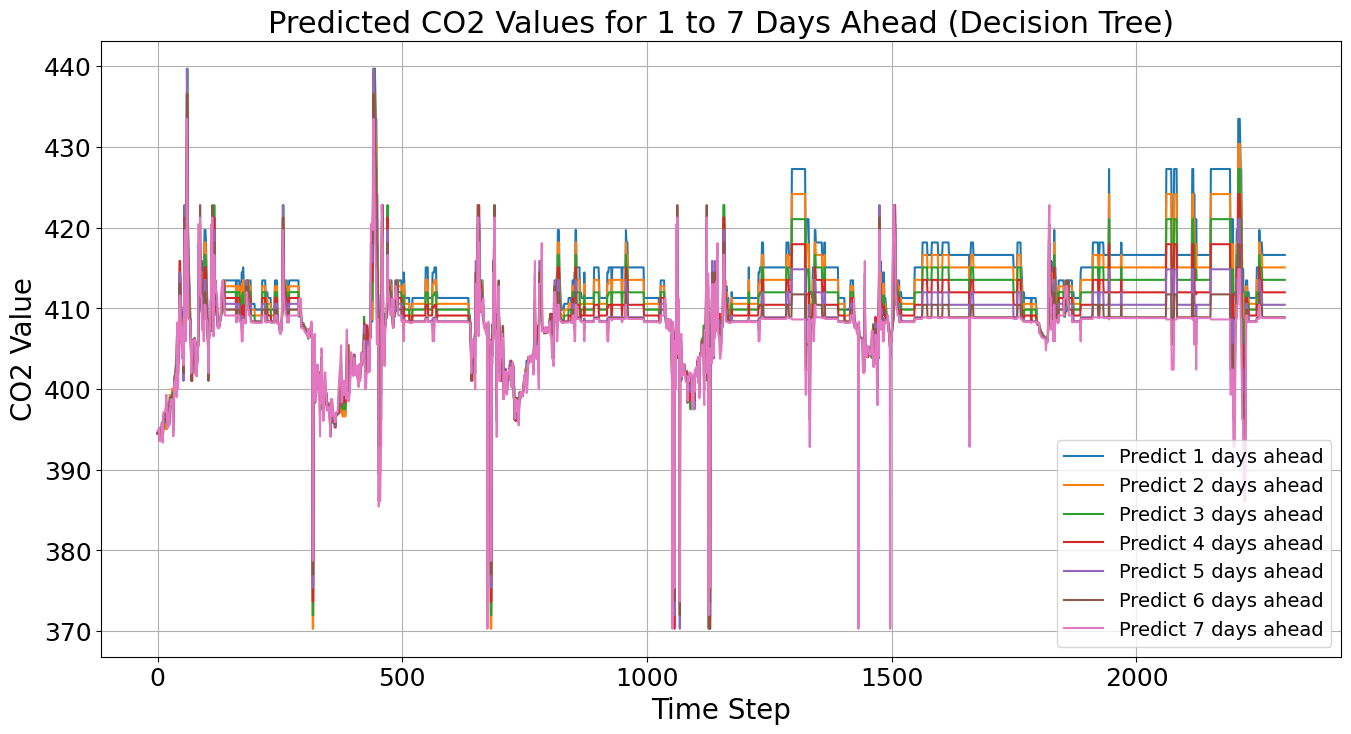

Random Forest Model Performance:
Day 1: MSE = 7.1929, R² = 0.9032
Day 2: MSE = 15.1050, R² = 0.7964
Day 3: MSE = 27.3721, R² = 0.6304
Day 4: MSE = 43.2375, R² = 0.4151
Day 5: MSE = 61.9931, R² = 0.1600
Day 6: MSE = 82.4240, R² = -0.1188
Day 7: MSE = 103.0139, R² = -0.4006

Decision Tree Model Performance:
Day 1: MSE = 16.4430, R² = 0.7787
Day 2: MSE = 28.1521, R² = 0.6205
Day 3: MSE = 41.7251, R² = 0.4365
Day 4: MSE = 58.5974, R² = 0.2073
Day 5: MSE = 77.7077, R² = -0.0530
Day 6: MSE = 95.5688, R² = -0.2972
Day 7: MSE = 109.2281, R² = -0.4851


In [18]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 假设 df_full 已经准备好，包含 'co2_value' 和 'time' 列，且 'time' 已设置为索引
df_full['time'] = pd.to_datetime(df_full.index)
df_full.set_index('time', inplace=True)

# 提取目标值
values = df_full['co2_value'].values

# 创建数据集，使用过去的 10 天预测之后的 1 到 7 天
def create_supervised(data, time_step=10, predict_days=7):
    X, y = [], []
    for i in range(len(data) - time_step - predict_days):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step:i + time_step + predict_days])
    return np.array(X), np.array(y)

# 准备数据
time_step = 10
predict_days = 7
X, y = create_supervised(values, time_step, predict_days)

# 划分训练和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 初始化模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)

# 训练随机森林模型
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# 训练决策树模型
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# 设置全局字体大小和网格
plt.rcParams.update({'font.size': 14})

# 绘制随机森林预测值
plt.figure(figsize=(16, 8))
for day in range(predict_days):
    plt.plot(range(len(rf_pred)), rf_pred[:, day], label=f'Predict {day+1} days ahead')
plt.title('Predicted CO2 Values for 1 to 7 Days Ahead (Random Forest)', fontsize=22)
plt.xlabel('Time Step', fontsize=20)
plt.ylabel('CO2 Value', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)  # 添加网格
plt.legend(fontsize=14)
plt.show()

# 绘制决策树预测值
plt.figure(figsize=(16, 8))
for day in range(predict_days):
    plt.plot(range(len(dt_pred)), dt_pred[:, day], label=f'Predict {day+1} days ahead')
plt.title('Predicted CO2 Values for 1 to 7 Days Ahead (Decision Tree)', fontsize=22)
plt.xlabel('Time Step', fontsize=20)
plt.ylabel('CO2 Value', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)  # 添加网格
plt.legend(fontsize=14)
plt.show()

# 计算每个模型的 MSE 和 R2
print("Random Forest Model Performance:")
for day in range(predict_days):
    mse_rf = mean_squared_error(y_test[:, day], rf_pred[:, day])
    r2_rf = r2_score(y_test[:, day], rf_pred[:, day])
    print(f"Day {day + 1}: MSE = {mse_rf:.4f}, R² = {r2_rf:.4f}")

print("\nDecision Tree Model Performance:")
for day in range(predict_days):
    mse_dt = mean_squared_error(y_test[:, day], dt_pred[:, day])
    r2_dt = r2_score(y_test[:, day], dt_pred[:, day])
    print(f"Day {day + 1}: MSE = {mse_dt:.4f}, R² = {r2_dt:.4f}")

